### First lets understand in how many ways you can login to HF

In [ ]:
!pip install --upgrade huggingface_hub

| 🔢 Method                               | Code / Command                               | Used In                                                                                                                        | Description                                                                                       |
| --------------------------------------- | -------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------- |
| **1**                                   | `!huggingface-cli login`                     | Terminal / Colab / Jupyter (Shell cell)                                                                                      | CLI command. Prompts you to paste your HF token and saves it in global config. Works system-wide. |
| **2**                                   | `from huggingface_hub import HfApi`          |                                                                                                                                |                                                                                                   |
| `api = HfApi(token="YOUR_WRITE_TOKEN")` | Python Scripts / Automation                | Directly initializes an API object with token (temporary). Useful for scripting, CI/CD, etc. Doesn’t store token globally.     |                                                                                                   |
| **3**                                   | `from huggingface_hub import login`          |                                                                                                                                |                                                                                                   |
| `login("YOUR_TOKEN")`                   | Python Scripts                             | Programmatic login — stores token in local Hugging Face config (like CLI does). Good alternative to CLI login inside a script. |                                                                                                   |
| **4**                                   | `from huggingface_hub import notebook_login` |                                                                                                                                |                                                                                                   |
| `notebook_login()`                      | Jupyter / Colab Notebooks                  | Interactive login box inside notebooks. Token is saved in session/local config. Beginner-friendly.                             |                                                                                                   |


In [ ]:
from google.colab import userdata

In [ ]:
READ_TOKEN=userdata.get("HF_TOKEN_READ")

In [ ]:
WRITE_TOKEN=userdata.get('HF_TOKEN_WRITE')

In [ ]:
# import os
# os.environ["HF_READ_TOKEN"] = userdata.get("HF_READ_TOKEN")
# os.environ["HF_WRITE_TOKEN"] = userdata.get("HF_WRITE_TOKEN")


#### First is CLI

In [ ]:
#This command tells Git to save your credentials (username + password or token) permanently in a plain text file on your computer,
#so you don’t have to enter them again when pushing/pulling from a remote repo.

In [ ]:
!huggingface-cli login

In [ ]:
!huggingface-cli whoami

#### for this one you will have to use token with write permission

In [ ]:
!huggingface-cli repo create livehfcourse --repo-type model

In [ ]:
!huggingface-cli repo create livehfdatacourse --repo-type dataset

In [ ]:
!huggingface-cli repo create dummy --repo-type=space --space=docker

### Seond Via API

In [ ]:
import os
from huggingface_hub import HfApi
from google.colab import userdata

In [ ]:
api = HfApi(token=WRITE_TOKEN)

In [ ]:
api.create_repo(
    repo_id="sunny199/sunnyrepo",  # full path
    repo_type="model",                         # or just skip (default is model)
    private=False                              # set True for private repo
)

In [ ]:
api.upload_file(
    path_or_fileobj="/content/testfile/config.json",
    path_in_repo="config.json",  # Where it goes in repo
    repo_id="sunny199/sunnyrepo"  # Same as created above
)

## Third Via login

In [ ]:
from huggingface_hub import login

login(READ_TOKEN)

In [ ]:
from huggingface_hub import login

login(WRITE_TOKEN)

## Notebook login

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

## Install datasets library

In [ ]:
!pip install -U datasets fsspec

## Load the Dataset

In [ ]:
# import shutil
# shutil.rmtree("/root/.cache/huggingface/datasets", ignore_errors=True)

In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset("stanfordnlp/imdb")  # IMDB movie review dataset

In [ ]:
print(dataset)

| Split       |  Description                                                                   |
| -------------- | -------------------------------------------------------------------------------- |
| `train`        | 25,000 examples → For training a sentiment classifier                            |
| `test`         | 25,000 examples → For evaluating your model                                      |
| `unsupervised` | 50,000 examples → No clean label (used for pretraining or self-supervised tasks) |

In [ ]:
print(dataset["train"])

In [ ]:
print(dataset["train"][0])

In [ ]:
print(dataset["train"].features)
print(dataset["train"].column_names)
print(dataset["train"].features["label"].names)
print(dataset["train"].num_rows)
print(dataset["train"].num_columns)
print(dataset["train"].shape)

In [ ]:
shuffled = dataset["train"].shuffle()

In [ ]:
shuffled

In [ ]:
shuffled = dataset["train"].shuffle(seed=42)

In [ ]:
shuffled


In [ ]:
shuffled.select(range(100))

In [ ]:
# Random 5,000 samples from train split
subset_train = dataset["train"].shuffle(seed=42).select(range(5000))

In [ ]:
subset_train

### preprocessing on dataset

short_reviews naam ka naya dataset milega (Dataset object), jisme sirf short reviews (under 100 characters) honge.

In [ ]:
dataset["train"]

In [ ]:
short_reviews = dataset["train"].filter(lambda x: len(x["text"]) < 100)

In [ ]:
short_reviews

In [ ]:
short_reviews = subset_train.filter(lambda x: len(x["text"]) < 100)

In [ ]:
short_reviews

In [ ]:
short_positive = dataset["train"].filter(lambda x: x["label"] == 1 and len(x["text"]) < 200)

In [ ]:
short_positive

In [ ]:
def add_word_count(example):
    example["word_count"] = len(example["text"].split())
    return example

In [ ]:
dataset = dataset.map(add_word_count)

In [ ]:
dataset

In [ ]:
print(dataset["train"][0]["word_count"])

In [ ]:
print(dataset["train"][1]["word_count"])

In [ ]:
print(dataset["train"][2]["word_count"])

In [ ]:
split_dataset = dataset["train"].train_test_split(test_size=0.2)

In [ ]:
split_dataset

######openwebtext is a large-scale, internet-based corpus (similar to what GPT-2 was trained on), containing raw text scraped from web pages.

streaming=True
⚠️ Very important!

Normally, Hugging Face datasets are downloaded completely to disk before being used (especially for large datasets, this can be slow/heavy).

When streaming=True:

The dataset is not downloaded in full

Data is streamed sample-by-sample on-the-fly

Useful for huge datasets that can’t fit into memory (like c4, the_pile, openwebtext)

You get a generator-style iterable dataset, not an in-memory list

In [ ]:
big_data = load_dataset("openwebtext", streaming=True)

In [ ]:
big_data

| Part                  | Meaning                                                 |
| --------------------- | ------------------------------------------------------- |
| `IterableDatasetDict` | Dictionary-like object with splits (`train`, etc.)      |
| `train`               | Only split provided in `openwebtext`                    |
| `features: ['text']`  | Each example is a dict: `{"text": "...large block..."}` |
| `num_shards: 21`      | Internally it's chunked into 21 streamable parts        |


Dataset: openwebtext

Size: ~8.13 million documents

Total tokens: ~40+ billion tokens

Size on disk: ~38 GB

In [ ]:
for item in big_data["train"].take(5):
    print(item)

c4 → Colossal Clean Crawled Corpus
Full Form:
C4 = Colossal Clean Crawled Corpus

It was introduced in the T5 paper (Text-to-Text Transfer Transformer) by Google and used as its main pretraining dataset.

"c4"	The dataset ID (web-crawled dataset)

"en"	Subset config → English-only version

In [ ]:
web_crawled_data = load_dataset("c4", "en", split="train", streaming=True)

In [ ]:
for i, item in enumerate(web_crawled_data):
    print(item)
    if i > 4:
        break

Dataset: tweet_eval – Sentiment Classification Task

Full Name: TweetEval: Unified Benchmark for Tweet Classification Tasks

This dataset comes from the TweetEval paper and includes multiple Twitter-specific NLP tasks.

In [ ]:
# Load Dataset
dataset = load_dataset("tweet_eval", "sentiment")

In [ ]:
dataset

| Part          | Meaning                                    |
| ------------- | ------------------------------------------ |
| `tweet_eval`  | Dataset collection for Twitter NLP         |
| `"sentiment"` | Subset task: sentiment classification      |
| Labels        | 0 = Negative, 1 = Neutral, 2 = Positive    |
| Use case      | Train/test sentiment classifiers on tweets |


In [ ]:
import matplotlib.pyplot as plt
labels = [example["label"] for example in dataset["train"]]
plt.hist(labels, bins=3, edgecolor="black")
plt.xticks([0,1,2], ["Negative", "Neutral", "Positive"])
plt.title("Tweet Sentiment Distribution")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
label_counts = Counter([ex["label"] for ex in dataset["train"]])
labels = ["Negative", "Neutral", "Positive"]
counts = [label_counts[i] for i in range(3)]

In [ ]:
counts

In [ ]:
plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Sentiment Proportions (Pie Chart)")
plt.axis("equal")
plt.show()


In [ ]:
from collections import Counter
import re
all_words = []
for i in range(1000):
    words = re.findall(r"\w+", dataset["train"][i]["text"].lower())
    all_words.extend(words)
top_words = Counter(all_words).most_common(20)
words, counts = zip(*top_words)

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(words, counts, color="orange")
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Tweets")
plt.tight_layout()
plt.show()

What is a Word Cloud?

A Word Cloud (a.k.a. text cloud or tag cloud) is a visual representation of text data where more frequent words appear larger and less frequent words appear smaller.

It's like a frequency heatmap — but in word form 🌥️

| Purpose                                                |  Benefit                                                      |
| --------------------------------------------------------- | --------------------------------------------------------------- |
| ✅ See most frequent words                                 | Helps you understand what's commonly talked about in a dataset  |
| ✅ Spot noise or junk tokens                               | E.g., unnecessary punctuation, stopwords                        |
| ✅ Compare two groups (e.g., positive vs negative reviews) | You can generate separate word clouds to understand differences |
| ✅ Preprocessing validation                                | Check if text cleaning worked or not                            |
| ✅ Topic discovery                                         | Gives a rough sense of what themes are present                  |


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_text = " ".join(dataset["train"][i]["text"] for i in range(1000))
wordcloud = WordCloud(width=800, height=400).generate(all_text)

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Tweets")
plt.show()

In [ ]:
from wordcloud import WordCloud

for label_id, label_name in enumerate(["Negative", "Neutral", "Positive"]):
    text = " ".join(example["text"] for example in dataset["train"] if example["label"] == label_id)
    wc = WordCloud(width=800, height=400).generate(text)

    plt.figure(figsize=(10, 4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {label_name} Tweets")
    plt.show()

## Custom dataset

In [ ]:
from datasets import Dataset
import pandas as pd

data = {
    "text": [
        "I love this product! Works great ",
        "Terrible experience, I want a refund.",
        "Fast delivery and excellent packaging.",
        "Worst app I’ve ever used. Crashed in 1 minute.",
        "Super helpful support team, thanks a lot!",
        "Nothing worked. Waste of time."
    ],
    "label": [1, 0, 1, 0, 1, 0]  # 1 = Positive, 0 = Negative
}

In [ ]:
data

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
dataset = Dataset.from_pandas(df)

In [ ]:
dataset

In [ ]:
dataset = dataset.class_encode_column("label")  # optional: make label a ClassLabel

In [ ]:
dataset

In [ ]:
import os
from google.colab import userdata
os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN_WRITE")

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from huggingface_hub import whoami
print(whoami())

In [ ]:
dataset.push_to_hub("sunny199/mycustomdata")

### Tokenization

#### Install the transformer library

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [ ]:
def tokenize(example):
    return tokenizer(example, truncation=True, padding="max_length")

In [ ]:
dataset["text"][0]

In [ ]:
tokenize(dataset["text"][0])

In [ ]:
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length")

In [ ]:
encoded_dataset = dataset.map(tokenize, batched=True)

In [ ]:
encoded_dataset

In [ ]:
encoded_dataset['input_ids'][0]

In [ ]:
encoded_dataset['token_type_ids'][0]

In [ ]:
tokenizer

In [ ]:
tokens=tokenizer.tokenize("Hello HuggingFace!")

In [ ]:
tokens

In [ ]:
tokens = tokenizer.tokenize("Hello, how are you?")

In [ ]:
tokens

In [ ]:
hindi_tokenizer = AutoTokenizer.from_pretrained("ai4bharat/indic-bert")

In [ ]:
tokens=hindi_tokenizer.tokenize("मुझे एआई पसंद है।")

In [ ]:
tokens

In [ ]:
inputs = tokenizer("Hello, how are you?", return_tensors="pt")

In [ ]:
inputs

1. input_ids:

These are the IDs of the tokens from the model’s vocabulary.

The sentence "Hello, how are you?" gets tokenized as:

[CLS] Hello , how are you ? [SEP]

Which corresponds to:

[101, 7592, 1010, 2129, 2024, 2017, 1029, 102]

2. token_type_ids:

These are used in tasks like Next Sentence Prediction.

0 means it's part of the first sentence

If there was a second sentence, it would have 1s

Since your input is just a single sentence, all values are 0.

3. attention_mask:

Tells the model which tokens are real and which are padding.

1 means the token is real (not padding)

0 means it’s padding (none here)

What does return_tensors="pt" do?

It returns everything as PyTorch tensors (pt = PyTorch).

If you use return_tensors="tf", you'll get TensorFlow tensors.

### How to tokenize large dataset faster

In [ ]:
import time
text = ["This is a sample sentence for tokenization."] * 100000

In [ ]:
# Fast
start = time.time()
tok_fast = AutoTokenizer.from_pretrained("bert-base-cased", use_fast=True)
tok_fast(text, padding=True, truncation=True)
print("Fast Time:", time.time() - start)

In [ ]:
# Slow
start = time.time()
tok_slow = AutoTokenizer.from_pretrained("bert-base-cased", use_fast=False)
tok_slow(text, padding=True, truncation=True)
print("Slow Time:", time.time() - start)

| Feature         | Fast Tokenizer (`use_fast=True`)       | Slow Tokenizer (`use_fast=False`) |
| --------------- | -------------------------------------- | --------------------------------- |
| Backend         | Built in **Rust** (super fast)       | Built in **Python** (slower)   |
| Tokenizer Class | `BertTokenizerFast`                    | `BertTokenizer`                   |
| Speed           | Very fast                           | Much slower                    |
| Library Used    | `tokenizers` (Rust)                    | `transformers` (pure Python)      |
| Memory usage    | Slightly higher (due to Rust overhead) | Lower                             |


## Do you wanna create your own tokenizer?

### Here You're training your own custom tokenizer from scratch using the Byte Pair Encoding (BPE) algorithm, with Hugging Face’s fast tokenizers library.

Below code creates a custom tokenizer from your own small dataset using the BPE algorithm, with:

Whitespace splitting,

100-token vocabulary,

Trained from scratch.

Byte Pair Encoding (BPE) is a subword tokenization algorithm that helps break down words into smaller pieces (subwords), making it especially useful for handling rare words and unknown words in NLP tasks.

In [ ]:
from tokenizers import Tokenizer, models, trainers, pre_tokenizers
corpus = ["I love transformers!", "Tokenizers are amazing.", "Build your own.\n"]

In [ ]:
corpus

In [ ]:
tokenizer = Tokenizer(models.BPE())

In [ ]:
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

In [ ]:
trainer = trainers.BpeTrainer(vocab_size=100)

In [ ]:
tokenizer.train_from_iterator(corpus, trainer)

In [ ]:
# Save
tokenizer.save("custom-tokenizer.json")

In [ ]:
from transformers import PreTrainedTokenizerFast

hf_tokenizer = PreTrainedTokenizerFast(
    tokenizer_file="/content/custom-tokenizer.json",
    unk_token="[UNK]",
    pad_token="[PAD]",
    cls_token="[CLS]",
    sep_token="[SEP]",
    mask_token="[MASK]"
)

In [ ]:
hf_tokenizer.save_pretrained("my_tokenizer_hf")

### Now load the model

In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [ ]:
inputs = tokenizer("Hello, how are you?", return_tensors="pt")

In [ ]:
model = AutoModel.from_pretrained("bert-base-uncased")

In [ ]:
model

In [ ]:
import torch
with torch.no_grad():
    outputs = model(**inputs)

In [ ]:
print(outputs)

In [ ]:
print(outputs.last_hidden_state.shape)

In [ ]:
print(outputs.last_hidden_state[0])

In [ ]:
print(len(outputs.last_hidden_state[0][0]))

In [ ]:
print(outputs.last_hidden_state[0][1])

In [ ]:
len(outputs.last_hidden_state[0].mean(dim=0))

In [ ]:
outputs.last_hidden_state[0].mean(dim=0)

In [ ]:
# print(outputs.last_hidden_state[0, 0])

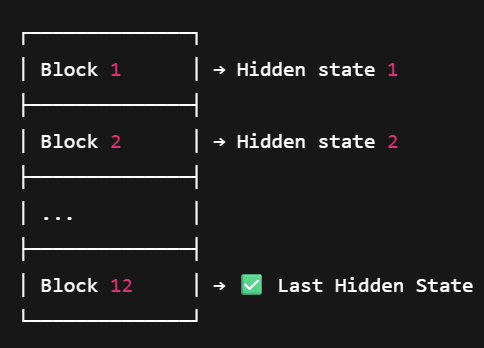

[Multi-head Attention] → [Add + Norm] → [Feedforward] → [Add + Norm]


### Lets Perform a small Practical

In [ ]:
from torch.nn.functional import cosine_similarity

In [ ]:
sentence1 = "Hello, how are you?"
sentence2 = "Hi, how do you do?"

In [ ]:
inputs1 = tokenizer(sentence1, return_tensors="pt")
inputs2 = tokenizer(sentence2, return_tensors="pt")

In [ ]:
with torch.no_grad():
    output1 = model(**inputs1).last_hidden_state[0].mean(dim=0)
    output2 = model(**inputs2).last_hidden_state[0].mean(dim=0)

In [ ]:
similarity = cosine_similarity(output1, output2, dim=0)
print(f"Similarity: {similarity.item():.4f}")

## sentence transformer library: https://huggingface.co/sentence-transformers

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
# Load a sentence embedding model (trained for similarity tasks)
model = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
# Step 1: Encode both sentences into embeddings
embedding1 = model.encode(sentence1, convert_to_tensor=True)

In [ ]:
embedding1

In [ ]:
len(embedding1)

In [ ]:
embedding2 = model.encode(sentence2, convert_to_tensor=True)

In [ ]:
embedding2

In [ ]:
similarity = cosine_similarity(embedding1, embedding2, dim=0)
print(f"Similarity: {similarity.item():.4f}")

## Example of AutoModelClass with Different heads

| Task                        | Class Name                                          | Description                                          |
| --------------------------- | --------------------------------------------------- | ---------------------------------------------------- |
| Base Model               | `AutoModel`                                         | Just embeddings (no head), for feature extraction    |
| Masked LM                | `AutoModelForMaskedLM`                              | For BERT-style `[MASK]` prediction                   |
| Sequence Classification | `AutoModelForSequenceClassification`                | For sentence-level tasks like sentiment, spam        |
| Token Classification     | `AutoModelForTokenClassification`                   | For NER, POS tagging (token-level labels)            |
| Multiple Choice          | `AutoModelForMultipleChoice`                        | For MCQ tasks (e.g., SWAG dataset)                   |
| Next Sentence Prediction | `AutoModelForNextSentencePrediction`                | For NSP (mainly BERT pretraining)                    |
| Causal LM (Text Gen)     | `AutoModelForCausalLM`                              | For GPT-style models (left-to-right text generation) |
| Seq2Seq LM               | `AutoModelForSeq2SeqLM`                             | For translation, summarization (T5, BART)            |
| Question Answering       | `AutoModelForQuestionAnswering`                     | For extractive QA (SQuAD-style)                      |
| Vision Tasks            | `AutoModelForImageClassification`, etc.             | For image classification (e.g., ViT)                 |
| Audio Tasks              | `AutoModelForAudioClassification`, etc.             | For Wav2Vec, Whisper, etc.                           |
| Conditional Generation   | `AutoModelForConditionalGeneration`                 | For T5/BART-style seq2seq tasks                      |
| Zero-shot Tasks          | `AutoModelForZeroShotClassification` (via pipeline) | For inference without fine-tuning                    |
| Contrastive Learning     | `AutoModelForContrastiveLearning`                   | For embeddings comparison tasks                      |


In [ ]:
sentence = "I am doing very happy"

In [ ]:
inputs = tokenizer(sentence, return_tensors="pt")

In [ ]:
inputs

In [ ]:
inputs.pop("token_type_ids")

In [ ]:
inputs

In [ ]:
from transformers import AutoModelForSequenceClassification

In [ ]:
clf_model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [ ]:
import torch
with torch.no_grad():
    outputs = clf_model(**inputs)

In [ ]:
logits = outputs.logits

In [ ]:
predicted_class = torch.argmax(logits, dim=1)

In [ ]:
print(predicted_class.item())  # 1 = Positive, 0 = Negative

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

In [ ]:
gpt_tok = AutoTokenizer.from_pretrained("gpt2")
gpt_model = AutoModelForCausalLM.from_pretrained("gpt2")

In [ ]:
sentence = "Transformers are beast"

In [ ]:
gpt_inputs = gpt_tok(sentence, return_tensors="pt")

In [ ]:
with torch.no_grad():
    gpt_output = gpt_model.generate(
        gpt_inputs["input_ids"],
        max_length=gpt_inputs["input_ids"].shape[1] + 5,  # predict next 5 tokens
        do_sample=False  # deterministic output
    )


In [ ]:
generated_text = gpt_tok.decode(gpt_output[0], skip_special_tokens=True)

In [ ]:
print("GPT-2 generated:", generated_text)

In [ ]:
from transformers import AutoConfig, AutoModel

In [ ]:
config = AutoConfig.from_pretrained("bert-base-uncased")

In [ ]:
print(config.hidden_size)
print(config.num_attention_heads)
print(config.vocab_size)
print(config.hidden_act)  # shows which activation function is used
print(config.num_labels)

In [ ]:
config.num_labels = 5  # change for multi-class classification

In [ ]:
print(config.num_labels)

In [ ]:
model = AutoModel.from_config(config)  # No pretrained weights

In [ ]:
model

| Feature                      | `AutoModel`, `AutoModelForSequenceClassification`, etc. | `AutoConfig`     |
| ---------------------------- | ------------------------------------------------------- | ---------------- |
| Load Pretrained Weights?     | ✅ Yes                                                   | ❌ No             |
| Returns Model?               | ✅ Yes (BERT, DistilBERT, etc.)                          | ❌ No             |
| Used for Training/Inference? | ✅                                                       | ❌ (only config)  |
| Editable for Custom Models?  | Limited                                                 | ✅ Fully Editable |


#### If you want to download the model on your local machine then follow below code

In [ ]:
from huggingface_hub import snapshot_download

In [ ]:
snapshot_download(
    repo_id="bert-base-uncased",
    local_dir="/content/test",   # where to download
    local_dir_use_symlinks=False  # to copy instead of symlinking
)

### Load the model

In [ ]:
from transformers import AutoTokenizer, AutoModel

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("/content/test")

In [ ]:
tokenizer

In [ ]:
model = AutoModel.from_pretrained("/content/test")

In [ ]:
model

# Inbuilt Pipeline method

| Parameter           | Type                        | Description / Use Case                                                               |
| ------------------- | --------------------------- | ------------------------------------------------------------------------------------ |
| `task`              | `str`                       | Task name like `"text-classification"`, `"text-generation"`, `"summarization"`, etc. |
| `model`             | `str` or `PreTrainedModel`  | Model name (e.g., `"bert-base-uncased"`) or loaded model object                      |
| `tokenizer`         | `str` or Tokenizer Object   | Optional – auto-loaded from model if not given                                       |
| `config`            | `str` or `PretrainedConfig` | Optional – custom configuration (e.g., num labels, dropout, etc.)                    |
| `framework`         | `str` (`"pt"` or `"tf"`)    | Force PyTorch or TensorFlow (auto-detected if not set)                               |
| `device`            | `int` or `str`              | `0` = GPU, `-1` = CPU, `"cuda"` or `"cpu"`                                           |
| `revision`          | `str`                       | Git branch/tag/commit from Hugging Face Hub (e.g., `"main"`, `"v1.0"`)               |
| `use_fast`          | `bool`                      | Whether to use fast tokenizer (defaults to `True`)                                   |
| `token`             | `str` or `bool`             | Hugging Face token (needed for private models or rate limits)                        |
| `device_map`        | `Any`                       | For multi-GPU / model parallelism                                                    |
| `torch_dtype`       | `torch.dtype`               | Force precision: e.g., `torch.float16` for faster inference                          |
| `trust_remote_code` | `bool`                      | Allow loading custom `model.py` logic from HF repo (for advanced/custom models)      |
| `model_kwargs`      | `dict`                      | Extra arguments to pass to model (e.g., `temperature`, `top_p`, `max_length`, etc.)  |
| `feature_extractor` | `str` or Object             | Used for older vision/audio models (now replaced by `image_processor`)               |
| `image_processor`   | `BaseImageProcessor`        | For image tasks (used in ViT, SAM, etc.)                                             |
| `processor`         | `ProcessorMixin`            | For multi-modal models (e.g., Whisper, CLIP, LayoutLMv3)                             |
| `pipeline_class`    | `Any`                       | Custom pipeline class if you’re extending or modifying the base pipeline logic       |
| `**kwargs`          | `Any`                       | Additional pipeline-specific keyword arguments (like `max_length`, `top_k`, etc.)    |


In [ ]:
from transformers import pipeline

In [ ]:
classifier=pipeline("sentiment-analysis")

In [ ]:
classifier("i will learn AI throughout my entire life it is like a passion")

In [ ]:
classifier("mera dost don hai")

In [ ]:
result = pipeline("sentiment-analysis")("Hugging Face is awesome")
print(result)

In [ ]:
lassifier=pipeline("zero-shot-classification")

In [ ]:
res = lassifier(
    "This is a course about Python list comprehension",
    candidate_labels=["education", "politics", "business"],
)

In [ ]:
print(res)

In [ ]:
generation=pipeline("text-generation")

In [ ]:
generation("python is a simple language what is your thought?")

In [ ]:
generation("hello how are you?")

In [ ]:
summarizer=pipeline("summarization")

In [ ]:
text="A large language model (LLM) is a machine learning model that uses deep learning to perform natural language processing (NLP) tasks. LLMs are trained on large amounts of text to learn how to respond to user requests with human-like language."

In [ ]:
print(summarizer(text,max_length=10))

| Property          | Value                                                             |
| ----------------- | ----------------------------------------------------------------- |
| **Model Name**    | `google/long-t5-tglobal-base`                                     |
| **Architecture**  | Long-T5 (based on T5 but designed for *long documents*)           |
| **Type**          | Encoder-decoder Transformer (seq2seq)                             |
| **Token Limit**   | Can handle **16,384 tokens** (way more than normal T5 → 512/1024) |
| **Attention**     | Uses **"Transverse Global Attention"**, better for long contexts  |
| **Pretrained By** | Google Research                                                   |
| **Tasks**         | Mainly for **summarization**, also good for long text generation  |
| **Variants**      | `base`, `large`, `xl` – you are using `base`                      |


In [ ]:
summarizer = pipeline("summarization", model="google/long-t5-tglobal-base")

In [ ]:
summary = summarizer(text, max_length=50, min_length=10, do_sample=False)

In [ ]:
print(summary[0]['summary_text'])

In [ ]:
qa = pipeline("question-answering")
print(qa(question="Where do I work?", context="I work at Hugging Face."))

In [ ]:
from transformers import pipeline
import time

texts = ["I absolutely love transformers!"] * 100

In [ ]:
# BERT
start = time.time()
bert = pipeline("sentiment-analysis", model="bert-base-uncased")
bert(texts)
print("BERT Time:", time.time() - start)

In [ ]:
# DistilBERT
start = time.time()
distil = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
distil(texts)
print("DistilBERT Time:", time.time() - start)

## Evalution Matrixs

In [ ]:
!pip install evaluate
!pip install rouge_score
!pip install evaluate[visualization]

In [ ]:
!pip install -U datasets fsspec

In [ ]:
import evaluate

In [ ]:
accuracy = evaluate.load("accuracy")

In [ ]:
result = accuracy.compute(predictions=[0, 1, 1, 0], references=[0, 1, 0, 0])

In [ ]:
print(result)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments

In [ ]:
# Load dataset subsets
train_dataset = load_dataset("imdb", split="train[:100]")
test_dataset = load_dataset("imdb", split="test[:100]")

In [ ]:
# Load pretrained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
# Tokenize and format
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length")

In [ ]:
# Tokenize train and test
train_encoded = train_dataset.map(tokenize, batched=True)
test_encoded = test_dataset.map(tokenize, batched=True)

In [ ]:
# Format for PyTorch
train_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
# Define Trainer with metrics
args = TrainingArguments(output_dir="eval-check", per_device_eval_batch_size=32,report_to="none")

In [ ]:
trainer = Trainer(model=model, args=args, compute_metrics=compute_metrics)

In [ ]:
metrics = trainer.evaluate(eval_dataset=test_encoded)

In [ ]:
print(metrics)

## bleu, rouge, perplexity

In [ ]:
from evaluate import load

bleu = load("bleu")

# Model output (machine translation)
predictions = ["The cat is sitting on the mat"]

# Human reference translation
references = [["The cat sat on the mat"]]

result = bleu.compute(predictions=predictions, references=references)
print("BLEU Score:", result)

| Metric            | Value | Meaning                        |
| ----------------- | ----- | ------------------------------ |
| `precisions[0]`   | 0.714 | 5/7 unigrams matched           |
| `precisions[1]`   | 0.5   | 3/6 bigrams matched            |
| `precisions[2]`   | 0.2   | 1/5 trigrams matched           |
| `precisions[3]`   | 0.0   | No 4-gram match ⇒ BLEU = 0     |
| `brevity_penalty` | 1.0   | No penalty (longer prediction) |
| `BLEU`            | 0.0   | Killed by zero 4-gram match    |


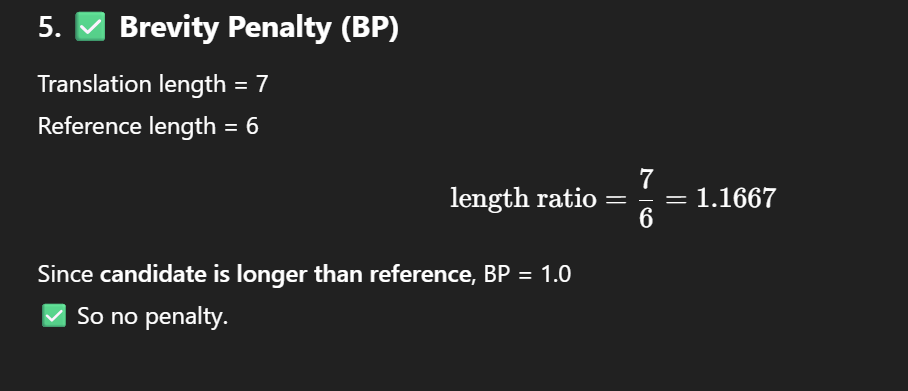

In [ ]:
from evaluate import load

bleu = load("bleu")

# Model-generated headline (prediction)
predictions = ["Government unveils new climate action plan"]

# Real human-written headline (reference)
references = [["Government announces new plan to fight climate change"]]

result = bleu.compute(predictions=predictions, references=references)
print("BLEU Score (Text Gen):", result)


In [ ]:
from evaluate import load

rouge = load("rouge")

# Model-generated summary
predicted_summary = ["Hugging Face develops powerful AI tools."]

# Ground truth (human-written) summary
reference_summary = ["Hugging Face is a company that builds AI models."]

result = rouge.compute(predictions=predicted_summary, references=reference_summary)
print("ROUGE Scores:", result)


| Metric       | Meaning                    | Score | Why                         |
| ------------ | -------------------------- | ----- | --------------------------- |
| `ROUGE-1`    | Unigram recall             | 0.4   | 3/9 words matched           |
| `ROUGE-2`    | Bigram recall              | 0.15  | Only "Hugging Face" matched |
| `ROUGE-L`    | Longest Common Subsequence | 0.4   | "Hugging Face AI" is LCS    |
| `ROUGE-Lsum` | Sentence-level LCS         | 0.4   | Same as above (1 sentence)  |


| Feature                 | **BLEU (Bilingual Evaluation Understudy)**          | **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)** |
| ----------------------- | --------------------------------------------------- | ------------------------------------------------------------- |
| **Primary Focus**       | Precision (How much predicted is correct)           | Recall (How much reference is captured)                       |
| **N-gram type**         | 1-gram to 4-gram precision                          | 1-gram to 4-gram recall + LCS (ROUGE-L)                       |
| **Formula Style**       | \$BLEU = BP \times \exp(\text{avg log precision})\$ | \$ROUGE = \frac{\text{overlap}}{\text{reference length}}\$    |
| **Brevity Penalty**     | Yes — penalizes too-short output                    | No — doesn’t punish short outputs                             |
| **Best For**            | Machine Translation, factual generation             | Summarization, content preservation                           |
| **Fails When**          | Synonyms used, multiple valid outputs               | Extra irrelevant content is present                           |
| **Overlap type**        | Exact n-gram match (no flexibility)                 | Longest sequence, flexible phrasing                           |
| **Multiple References** | Supported                                           | Supported                                                     |
| **Interpretation**      | Higher BLEU = more precise and fluent output        | Higher ROUGE = more informative and complete output           |
| **Used In**             | Machine Translation, chatbot QA, factual generation | Summarization, headline generation                            |
| **Metric Values**       | 0 to 1 (or 0 to 100%)                               | 0 to 1 (or 0 to 100%)                                         |


In [ ]:
from evaluate import load

perplexity = load("perplexity")

# Sentence generated by your language model
predictions = ["The government announced a new climate policy today."]

# Evaluate how fluent/confident GPT2 is on this sentence
result = perplexity.compute(predictions=predictions, model_id="gpt2")
print("Perplexity:", result)


| Aspect         | Value                                                                                 |
| -------------- | ------------------------------------------------------------------------------------- |
| Sentence       | `"The government announced a new climate policy today."`                              |
| Model          | `gpt2` (English LM)                                                                   |
| Perplexity     | **42.04**                                                                             |
| Interpretation | GPT-2 is **moderately unsure** about this sentence — it's not fluent but not terrible |
| Ideal Value    | Lower = Better (e.g., <30 = fluent, >100 = confused model)                            |


What Does 42.04 Mean?
GPT-2 thinks this sentence is somewhat unnatural or less expected.

A perplexity score of 42 is not terrible, but not fluent-level either.

Ideally, for fluent, natural English:

Good = 10–30

Acceptable = 30–50

Bad = > 100 (very low confidence)

In [ ]:
import evaluate
from evaluate.visualization import radar_plot

data = [
    {"accuracy": 0.9, "precision": 0.8, "f1": 0.85},
    {"accuracy": 0.85, "precision": 0.75, "f1": 0.8}
]
model_names = ["Model A", "Model B"]
plot = radar_plot(data=data, model_names=model_names)
plot.show()

## Huggingface_hub

In [ ]:
!pip install --upgrade "huggingface_hub>=0.33.1"

In [ ]:
from huggingface_hub import HfApi
api = HfApi()

In [ ]:
# Get model info without downloading it
model_info = api.model_info(repo_id="bert-base-uncased")

In [ ]:
print("Model Card Metadata:", model_info.card_data)
print("Tags:", model_info.tags)
print("Commit SHA:", model_info.sha)
print("Last Modified:", model_info.last_modified)
print("Files:", [f.rfilename for f in model_info.siblings])
print("Model ID:", model_info.card_data.get('modelId', 'Not available'))
print("Likes:", model_info.likes)
print("Author/Namespace:", model_info.author)
print("Is Private:", model_info.private)
print("Downloads:", model_info.downloads)

In [ ]:
models = api.list_models(search="emotion", sort="downloads", limit=5)

In [ ]:
for model in models:
    print(model.modelId, "-", model.downloads)

In [ ]:
models = api.list_models(filter="text-generation", sort="downloads", limit=10)

In [ ]:
for m in models:
    print(m.modelId, "-", m.downloads)

In [ ]:
from huggingface_hub import list_repo_files

In [ ]:
files = list_repo_files("google/flan-t5-base")
print(files)

In [ ]:
dataset = api.dataset_info("imdb")

In [ ]:
print("Description:", dataset.cardData.get("summary", "No summary"))
print("Files:", [f.rfilename for f in dataset.siblings])

In [ ]:
from huggingface_hub import hf_hub_download
import json
# Download config.json
config_path = hf_hub_download(repo_id="bert-base-uncased", filename="config.json")
with open(config_path) as f:
    config = json.load(f)
print("Hidden size:", config["hidden_size"])

In [ ]:
from huggingface_hub import InferenceClient

# Use the correct hosted model ID with repository owner prefix
client = InferenceClient(model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

response = client.text_classification("I love Hugging Face! ")
print(response)

In [ ]:
info = api.model_info("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
print("Pipeline tag:", info.pipeline_tag)

In [ ]:
from huggingface_hub import HfApi

api = HfApi()
# Search text generation models with hosted inference support
models = api.list_models(filter="text-generation", limit=20)
print("Sample models with inference support:")
for m in models:
    if m.pipeline_tag == "text-generation":
        print("-", m.modelId)

In [ ]:
from huggingface_hub import HfApi

api = HfApi()

# Pull only "warm" text-generation models served by HF-Inference, max 25 results
gen = api.list_models(
        inference_provider="hf-inference",
        pipeline_tag="text-generation",
        limit=25)

models = list(gen)
print(f"Found {len(models)} models")

In [ ]:
models

In [ ]:
for model_name in models:
      print(model_name.modelId)


In [ ]:
from huggingface_hub import InferenceClient

model_id = models[0].modelId
client = InferenceClient(model="meta-llama/Llama-3.1-8B-Instruct", provider="hf-inference")

out = client.text_generation(
        prompt="I saw a puppy, a cat and a raccoon during my bike ride in the park.",
        max_new_tokens=80,
        temperature=0.7)
print(out)


## Huggingface with Langchain

https://python.langchain.com/docs/integrations/providers/huggingface/

In [ ]:
!pip install accelerate
!pip install  bitsandbytes
# !pip install huggingface_hub

In [ ]:
!pip install langchain-huggingface
!pip install langchain_community

In [ ]:
from langchain_huggingface import ChatHuggingFace

In [ ]:
from langchain_huggingface import HuggingFaceEndpoint

In [ ]:
llm = HuggingFaceEndpoint(
    repo_id="deepseek-ai/DeepSeek-R1",
    task="text-generation",
    max_new_tokens=512,
    do_sample=False,
    repetition_penalty=1.03,
)

In [ ]:
chat_model = ChatHuggingFace(llm=llm)

In [ ]:
chat_model.invoke("hello how are you?")

In [ ]:
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

template="""Question: {question}
give me a answer in detail manner and in step by step manner"""

prompt=PromptTemplate(template=template,input_variables=["question"])

In [ ]:
llm_chain = (
        {"question": RunnablePassthrough()}
        | prompt
        | chat_model
        | StrOutputParser()
    )

In [ ]:
question="who is a first president of INDIA?"

In [ ]:
llm_chain.invoke({"question":question})

In [ ]:
from langchain_huggingface import HuggingFacePipeline
from langchain_huggingface import ChatHuggingFace

In [ ]:
llm = HuggingFacePipeline.from_model_id(
    model_id="HuggingFaceH4/zephyr-7b-beta",
    task="text-generation",
    pipeline_kwargs=dict(
        max_new_tokens=512,
        do_sample=False,
        repetition_penalty=1.03,
    ),
)

In [ ]:
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype="float16",
    bnb_4bit_use_double_quant=True,
)

In [ ]:
llm = HuggingFacePipeline.from_model_id(
    model_id="HuggingFaceH4/zephyr-7b-beta",
    task="text-generation",
    pipeline_kwargs=dict(
        max_new_tokens=512,
        do_sample=False,
        repetition_penalty=1.03,
        return_full_text=False,
    ),
    model_kwargs={"quantization_config": quantization_config},
)

In [ ]:
chat_model = ChatHuggingFace(llm=llm)

In [ ]:
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

template="""Question: {question}
give me a answer in detail manner and in step by step manner"""

prompt=PromptTemplate(template=template,input_variables=["question"])

In [ ]:
llm_chain = (
        {"question": RunnablePassthrough()}
        | prompt
        | chat_model
        | StrOutputParser()
    )

In [ ]:
question="who is a first president of INDIA?"

In [ ]:
llm_chain.invoke({"question":question})

In [ ]:
# from langchain_huggingface import HuggingFaceEmbeddings
# from langchain_huggingface import HuggingFaceEndpointEmbeddings
# from langchain_community.document_loaders.hugging_face_dataset import HuggingFaceDatasetLoader

# ARCHIVE

In [ ]:
# !pip install --upgrade datasets fsspec

# from datasets import load_dataset
# import shutil
# shutil.rmtree("/root/.cache/huggingface/datasets", ignore_errors=True)
# dataset = load_dataset("wikitext", "wikitext-2-raw-v1")

# # dataset = load_dataset("wikitext", "wikitext-2-raw-v1", download_mode="force_redownload")

# # Combine train/test into single list of strings
# def get_text(examples):
#     return {'text': examples['text']}

# dataset = dataset.map(get_text, batched=True)

# def tokenize_fn(example):
#     return hf_tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

# tokenized_dataset = dataset.map(tokenize_fn, batched=True, remove_columns=["text"])

# print("Model vocab size:", model.config.vocab_size)
# print("Tokenizer vocab size:", hf_tokenizer.vocab_size)
# print("Special tokens:", hf_tokenizer.all_special_tokens)
# print("Tokenizer vocab size:", len(hf_tokenizer))
# print("Max token id in dataset:", max(tokenized_dataset["train"][0]["input_ids"]))

# from transformers import GPT2Config, GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling

# config = GPT2Config(
#     vocab_size=hf_tokenizer.vocab_size,
#     n_positions=128,
#     n_ctx=128,
#     n_embd=256,
#     n_layer=4,
#     n_head=4
# )

# model = GPT2LMHeadModel(config)
# model.resize_token_embeddings(len(hf_tokenizer))

# # Training setup
# training_args = TrainingArguments(
#     output_dir="./gpt2-custom",
#     per_device_train_batch_size=8,
#     num_train_epochs=3,
#     logging_steps=10,
#     save_steps=100,
#     save_total_limit=2,
#     prediction_loss_only=True,
#     remove_unused_columns=False,
#      report_to="none"
# )

# data_collator = DataCollatorForLanguageModeling(tokenizer=hf_tokenizer, mlm=False)

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_dataset["train"],
#     data_collator=data_collator,
# )

# trainer.train()





# text_gen = pipeline("text-generation")
# print(text_gen("Once upon a time in a forest,", max_length=30))

# from transformers import pipeline

# t5 = pipeline("text2text-generation", model="t5-small")

# print("Summarize:\n", t5("summarize: Hugging Face provides free tools to explore NLP. They make ML super accessible!", max_length=20))

# print("Translate English to German:\n", t5("translate English to German: The book is on the table.", max_length=20))

# print("Question Answering:\n", t5("question: Where is the book?  context: The book is on the table.", max_length=20))

# fill_mask = pipeline("fill-mask")
# print(fill_mask("Hugging Face is the <mask> company."))

In [ ]:
# from datasets import load_dataset
# from evaluate import load
# from transformers import pipeline

# # Load pretrained paraphrase pipeline
# pipe = pipeline("text-classification", model="textattack/bert-base-uncased-MRPC")
# dataset = load_dataset("glue", "mrpc", split="validation[:50]")

# predictions = [int(pipe(f"{row['sentence1']} {row['sentence2']}")[0]['label'].split('_')[-1]) for row in dataset]
# accuracy = load("accuracy")
# print(accuracy.compute(predictions=predictions, references=dataset["label"]))

In [ ]:
# from transformers import AutoTokenizer, AutoModelForMaskedLM
# import torch

# bert_tok = AutoTokenizer.from_pretrained("bert-base-uncased")
# bert_model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")

# # Use [MASK] instead of <mask> for BERT
# sentence = "Transformers are [MASK] models."
# bert_inputs = bert_tok(sentence, return_tensors="pt")

# with torch.no_grad():
#     bert_output = bert_model(**bert_inputs)

# # Get index of [MASK] token
# mask_token_index = (bert_inputs["input_ids"] == bert_tok.mask_token_id).nonzero(as_tuple=True)[1].item()

# # Get top prediction for [MASK]
# mask_logits = bert_output.logits[0, mask_token_index]
# top_token_id = torch.argmax(mask_logits).item()
# predicted_token = bert_tok.decode([top_token_id])

# print("BERT predicted word:", predicted_token)

In [ ]:
# summarizer = pipeline("summarization", model="t5-small")
# text = "Transformers are a powerful architecture used in natural language processing. They rely on self-attention to capture relationships between words."
# summary = summarizer("summarize: " + text, max_length=30)
# print(summary)